In [0]:
import numpy as np
from datetime import datetime
np.random.seed(1337)  # for reproducibility

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import pandas as pd
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pylab as plt
from matplotlib import pyplot
import os


Using TensorFlow backend.


In [3]:
drive.mount('/content/gdrive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [4]:
!cd / && mkdir -p "/content/gdrive/My Drive/neural_networks/hw1/problem2/models/1"
!cd / && mkdir -p "/content/gdrive/My Drive/neural_networks/hw1/problem2/models/2"
!cd / && mkdir -p "/content/gdrive/My Drive/neural_networks/hw1/problem2/models/3"
!cd / && mkdir -p "/content/gdrive/My Drive/neural_networks/hw1/problem2/datasets"

File ‘/content/gdrive/My Drive/neural_networks/hw1/problem2/datasets/train.csv’ already there; not retrieving.
File ‘/content/gdrive/My Drive/neural_networks/hw1/problem2/datasets/test.csv’ already there; not retrieving.


In [0]:
batch_size = 128
nb_epoch = 10
nb_classes = 10

In [6]:
from sklearn.model_selection import train_test_split

os.chdir('/content/gdrive/My Drive/neural_networks/hw1/problem2')
data = pd.read_csv('datasets/train.csv', skiprows=1).values
unlabeled_data = pd.read_csv('datasets/test.csv', skiprows=1).values.reshape(27999, 28, 28, 1)

np.random.shuffle(unlabeled_data)

X = data[:, 1:].reshape(41999, 28, 28, 1)
Y = data[:, 0].flatten()
x_train, x_test, y_train_numeric, y_test_numeric = train_test_split(X, Y, test_size=0.25, random_state=64)

print("train data: ", x_train.shape)
print("test data: ", x_test.shape)

train data:  (31499, 28, 28, 1)
test data:  (10500, 28, 28, 1)


In [0]:
input_shape = (28, 28, 1)

In [8]:
# normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (31499, 28, 28, 1)
31499 train samples
10500 test samples


In [0]:
# convert class vectors to binary class matrices ("one-hot encoding")
y_train = np_utils.to_categorical(y_train_numeric, nb_classes)
y_test = np_utils.to_categorical(y_test_numeric, nb_classes)

In [0]:
def create_model(callbacks = None):
  model = Sequential()

  model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', strides=(1,1), input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', strides=(1,1)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', strides=(1,1)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(10, activation='softmax'))
  
  model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.5), 
              metrics=['accuracy'])
  
  return model

In [11]:
model = create_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
class TrainingTime(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.train_begin_time = datetime.now()

    def on_train_end(self, logs={}):
      print("Training took:", datetime.now() - self.train_begin_time)

In [13]:
from keras.callbacks import ModelCheckpoint

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=1, validation_data=(x_test, y_test),
          callbacks=[
              TrainingTime(),
              ModelCheckpoint('models/1/modelcheckpoint-{epoch:02d}', save_best_only=False),
              ModelCheckpoint('models/1/modelcheckpoint-best', monitor='val_acc',save_best_only=True),
          ],
)

Instructions for updating:
Use tf.cast instead.
Train on 31499 samples, validate on 10500 samples
Epoch 1/10
31499/31499 [==============================] - 7s 236us/step - loss: 2.2479 - acc: 0.1946 - val_loss: 2.0197 - val_acc: 0.5831
Epoch 2/10
31499/31499 [==============================] - 2s 65us/step - loss: 1.5876 - acc: 0.4633 - val_loss: 0.7183 - val_acc: 0.8295
Epoch 3/10
31499/31499 [==============================] - 2s 65us/step - loss: 0.8781 - acc: 0.7079 - val_loss: 0.3994 - val_acc: 0.8928
Epoch 4/10
31499/31499 [==============================] - 2s 65us/step - loss: 0.5882 - acc: 0.8108 - val_loss: 0.2352 - val_acc: 0.9351
Epoch 5/10
31499/31499 [==============================] - 2s 65us/step - loss: 0.4564 - acc: 0.8592 - val_loss: 0.1733 - val_acc: 0.9506
Epoch 6/10
31499/31499 [==============================] - 2s 64us/step - loss: 0.3793 - acc: 0.8874 - val_loss: 0.1524 - val_acc: 0.9549
Epoch 7/10
31499/31499 [==============================] - 2s 65us/step - loss: 

Test score: 0.12427281894996052
Test accuracy: 0.9619047619047619


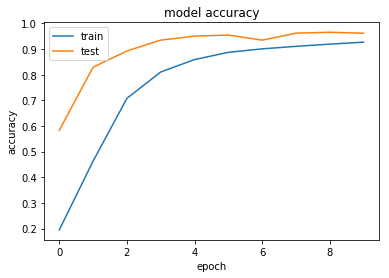

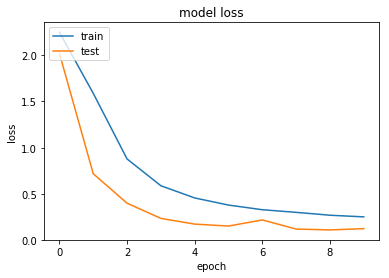

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

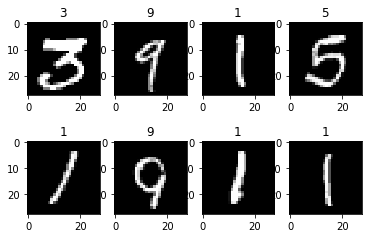

In [15]:
predicted_normal = np.argmax(model.predict(unlabeled_data), axis=1)
for i in range(0, 8):
  pyplot.subplot(2, 4, i + 1, title=predicted_normal[i])
  pyplot.imshow(unlabeled_data[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))

pyplot.show()

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 32)          0         
__________

In [0]:
# from keras.models import load_model
# model = load_model('models/2/modelcheckpoint-100')

In [0]:
model = create_model()

In [0]:
datagen = ImageDataGenerator(featurewise_center=True, zca_whitening=True, data_format='channels_last')
datagen.fit(x_train)

In [20]:
history = model.fit_generator(
    datagen.flow(x_train, y_train, batch_size=batch_size),                          
    validation_data=(x_test, y_test),      
    steps_per_epoch=1000,
    epochs=nb_epoch,
    callbacks=[
        TrainingTime(),
        ModelCheckpoint('models/2/modelcheckpoint-{epoch:02d}', save_best_only=False),
        ModelCheckpoint('models/2/modelcheckpoint-best', monitor='val_acc',save_best_only=True),
    ],
    verbose=1,
)

Epoch 1/10
1000/1000 [==============================] - 35s 35ms/step - loss: 1.2650 - acc: 0.5777 - val_loss: 0.9219 - val_acc: 0.8005
Epoch 2/10
1000/1000 [==============================] - 33s 33ms/step - loss: 0.4247 - acc: 0.8751 - val_loss: 0.5031 - val_acc: 0.8845
Epoch 3/10
1000/1000 [==============================] - 34s 34ms/step - loss: 0.2607 - acc: 0.9262 - val_loss: 0.4751 - val_acc: 0.8675
Epoch 4/10
1000/1000 [==============================] - 33s 33ms/step - loss: 0.2014 - acc: 0.9430 - val_loss: 0.4575 - val_acc: 0.8726
Epoch 5/10
1000/1000 [==============================] - 34s 34ms/step - loss: 0.1590 - acc: 0.9551 - val_loss: 0.4382 - val_acc: 0.8788
Epoch 6/10
1000/1000 [==============================] - 33s 33ms/step - loss: 0.1318 - acc: 0.9632 - val_loss: 0.3674 - val_acc: 0.9017
Epoch 7/10
1000/1000 [==============================] - 33s 33ms/step - loss: 0.1159 - acc: 0.9669 - val_loss: 0.3891 - val_acc: 0.8894
Epoch 8/10
1000/1000 [==========================

Test score: 0.3700035439247177
Test accuracy: 0.8935238095238095


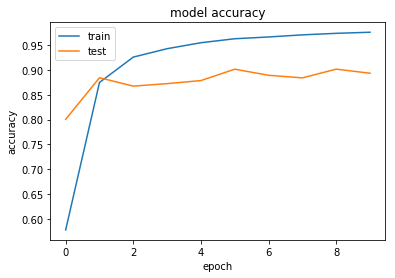

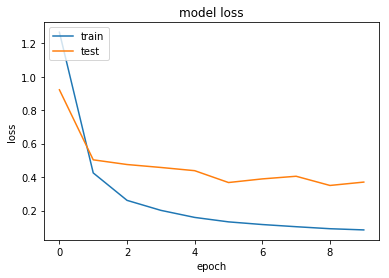

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

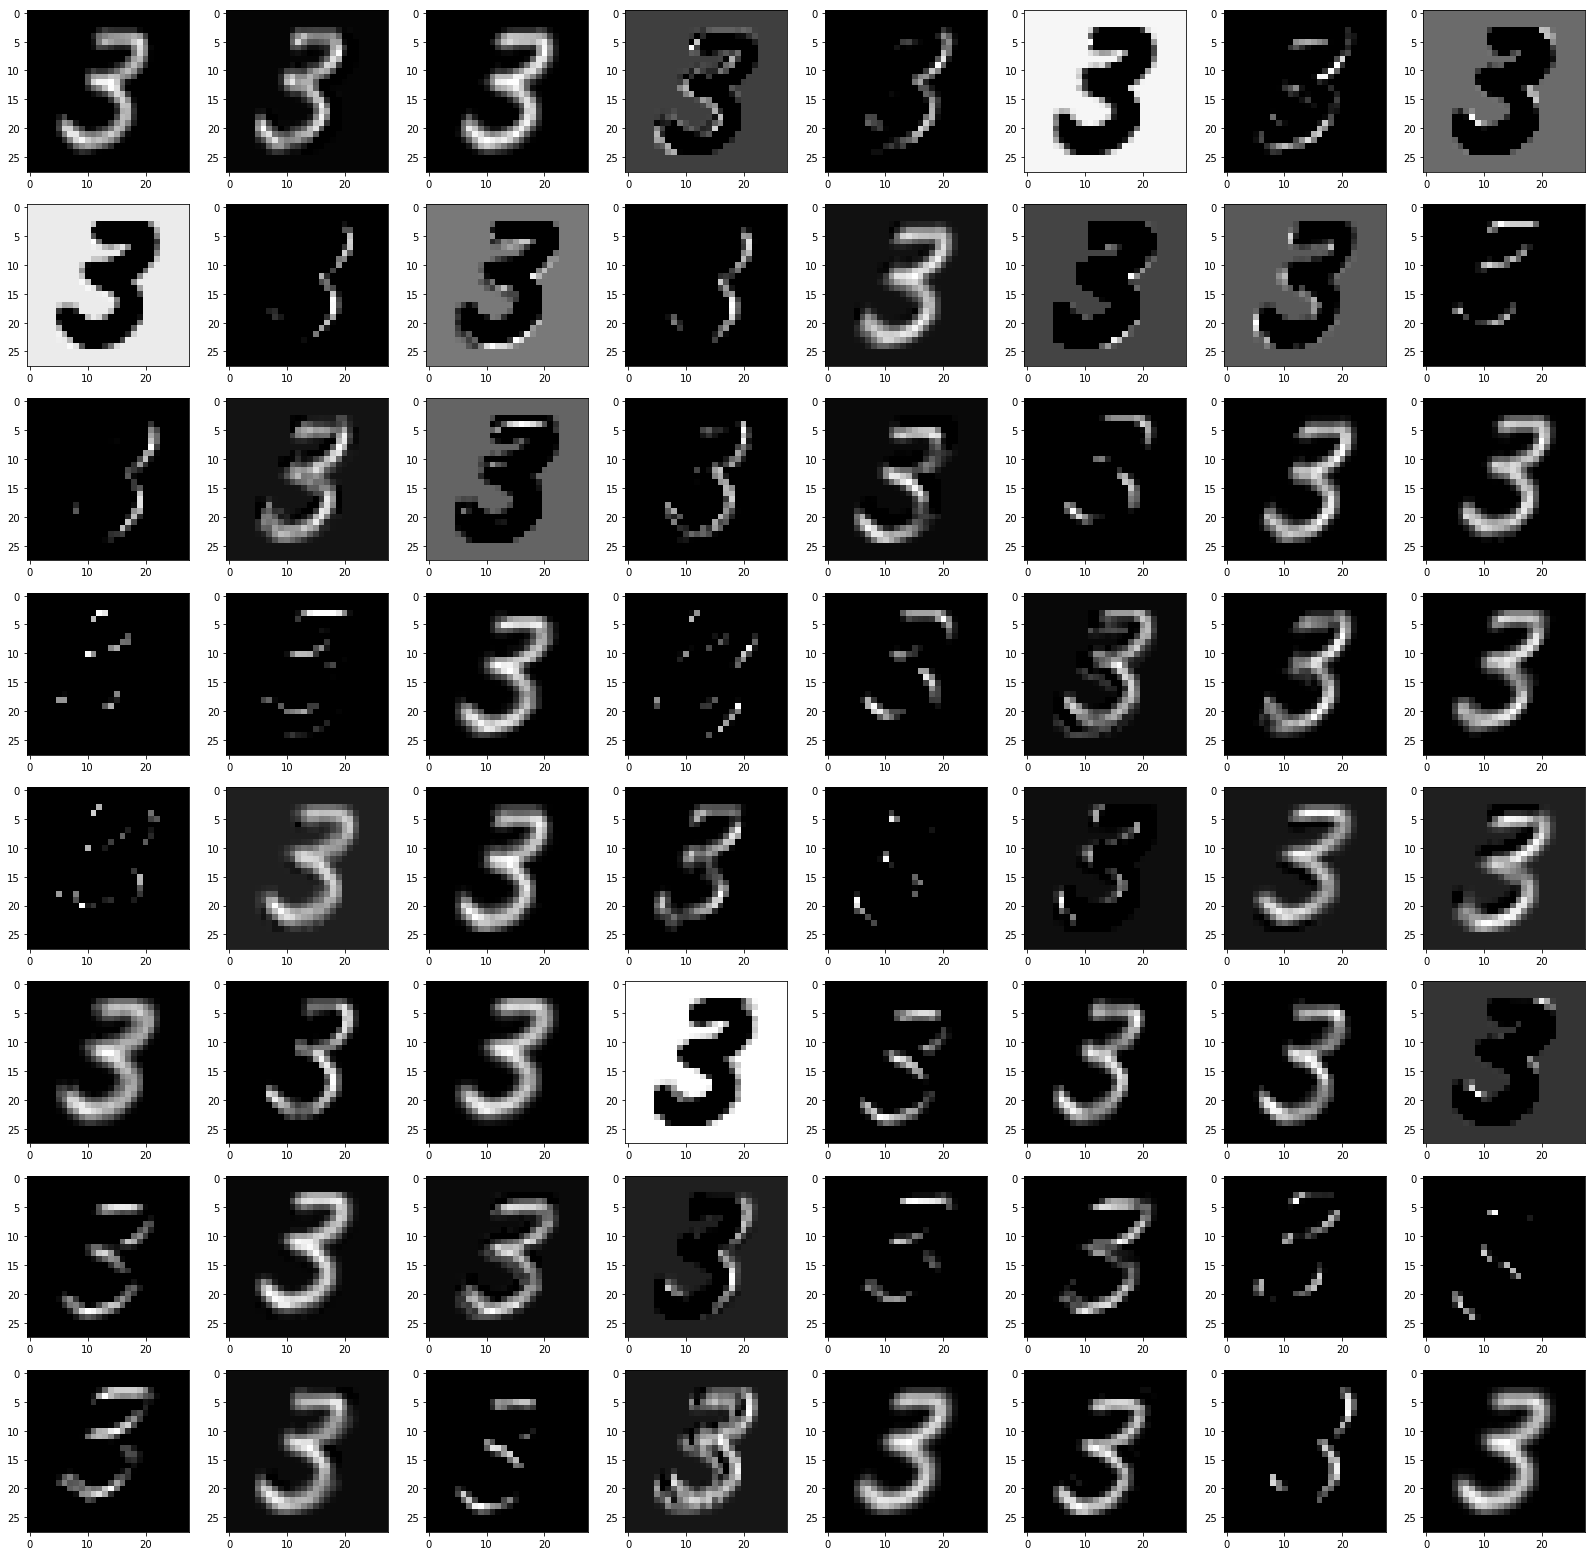

In [22]:
from keras import backend as K
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[0].output])
layer_output = np.array(get_3rd_layer_output([[x_test[0]]]))
layer_output=layer_output.reshape(28, 28, 64)
plt.figure(figsize=(28, 28))

for i in range(0, 64):
  image = layer_output[:, :, i]
  pyplot.subplot(8, 8, i + 1)
  pyplot.imshow(image, cmap=pyplot.get_cmap('gray'))

pyplot.show()


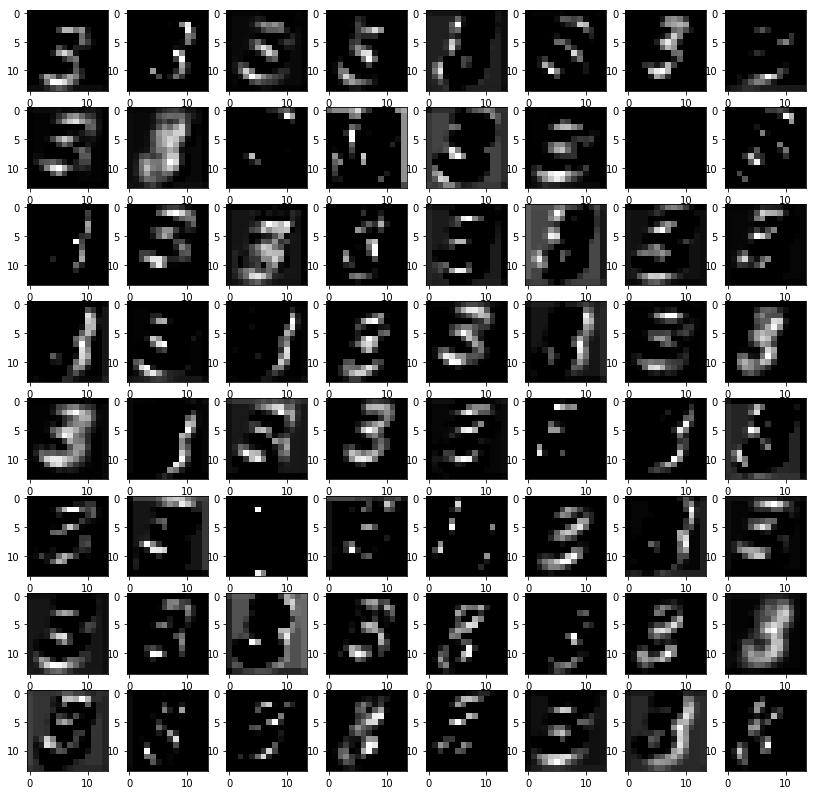

In [23]:
from keras import backend as K
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[2].output])
layer_output = np.array(get_3rd_layer_output([[x_test[0]]]))
layer_output=layer_output.reshape(14, 14, 64)
plt.figure(figsize=(14, 14))

for i in range(0, 64):
  image = layer_output[:, :, i]
  pyplot.subplot(8, 8, i + 1)
  pyplot.imshow(image, cmap=pyplot.get_cmap('gray'))

pyplot.show()

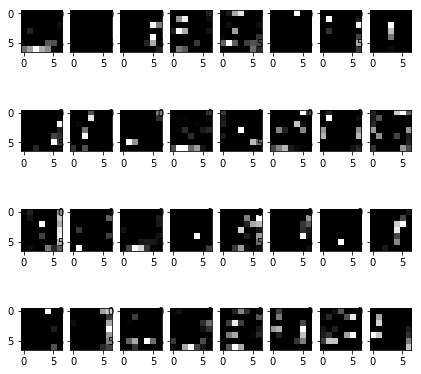

In [24]:
from keras import backend as K
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[4].output])
layer_output = np.array(get_3rd_layer_output([[x_test[0]]]))
layer_output=layer_output.reshape(7, 7, 32)
plt.figure(figsize=(7, 7))

for i in range(0, 32):
  image = layer_output[:, :, i]
  pyplot.subplot(4, 8, i + 1)
  pyplot.imshow(image, cmap=pyplot.get_cmap('gray'))

pyplot.show()


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

y_pr = np.argmax(model.predict(x_test), axis=1)

y_real = np.argmax(y_test, axis=1)


print(confusion_matrix(y_real, y_pr))
print('\n\nClassification Report:')
target_names = [str(i) for i in range(0, 10)]
print(classification_report(y_real, y_pr, target_names=target_names))

[[1041    3    0    0    0    0    1    0    0    5]
 [   0 1137    4    0    1    0    0    0    0    1]
 [   6   50  905    0    9    0    0   27    1    4]
 [  23   22   34  925    0   18    0   40    7   97]
 [   0   14    0    0  880    0    0    0    0   72]
 [  27   16    0    1    1  823   20    5    5   25]
 [  25   69    0    0   44    1  915    0    1    0]
 [   1   27    2    0    3    0    0 1077    0   22]
 [  36  170    2    0    4    1    8    6  645  132]
 [   3    9    0    0    3    1    0    9    0 1034]]


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1050
           1       0.75      0.99      0.85      1143
           2       0.96      0.90      0.93      1002
           3       1.00      0.79      0.88      1166
           4       0.93      0.91      0.92       966
           5       0.98      0.89      0.93       923
           6       0.97      0.87      0.92      1055
           

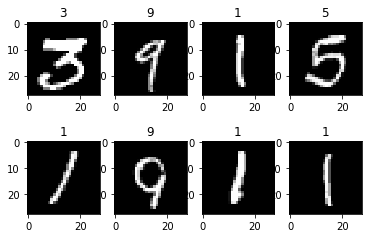

In [26]:
predicted_aug = np.argmax(model.predict(unlabeled_data), axis=1)
for i in range(0, 8):
  pyplot.subplot(2, 4, i + 1, title=predicted_aug[i])
  pyplot.imshow(unlabeled_data[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))

pyplot.show()

# 9

In [0]:
def learning_rate_scheduler(epoch, lr):
  decay_rate = 0.9
  if epoch:
    return lr * decay_rate
  return lr

In [0]:
normal_data_model = create_model()

In [29]:
from keras.callbacks import LearningRateScheduler
history2 = normal_data_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=nb_epoch,      
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[              
        TrainingTime(),
        LearningRateScheduler(learning_rate_scheduler, verbose=1),
        ModelCheckpoint('models/3/modelcheckpoint-{epoch:02d}', save_best_only=False),
        ModelCheckpoint('models/3/modelcheckpoint-best', monitor='val_acc',save_best_only=True),
    ],
)

Train on 31499 samples, validate on 10500 samples
Epoch 1/10

Epoch 00001: LearningRateScheduler setting learning rate to 0.009999999776482582.
31499/31499 [==============================] - 3s 80us/step - loss: 2.2458 - acc: 0.1933 - val_loss: 2.0535 - val_acc: 0.4467
Epoch 2/10

Epoch 00002: LearningRateScheduler setting learning rate to 0.008999999798834325.
31499/31499 [==============================] - 2s 64us/step - loss: 1.6565 - acc: 0.4409 - val_loss: 0.7743 - val_acc: 0.7942
Epoch 3/10

Epoch 00003: LearningRateScheduler setting learning rate to 0.008099999651312828.
31499/31499 [==============================] - 2s 64us/step - loss: 0.8771 - acc: 0.7065 - val_loss: 0.3509 - val_acc: 0.9149
Epoch 4/10

Epoch 00004: LearningRateScheduler setting learning rate to 0.007289999350905419.
31499/31499 [==============================] - 2s 69us/step - loss: 0.5988 - acc: 0.8055 - val_loss: 0.2748 - val_acc: 0.9207
Epoch 5/10

Epoch 00005: LearningRateScheduler setting learning rate t

Test score: 0.13438799654869807
Test accuracy: 0.9621904761904762


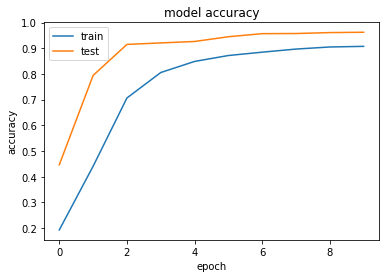

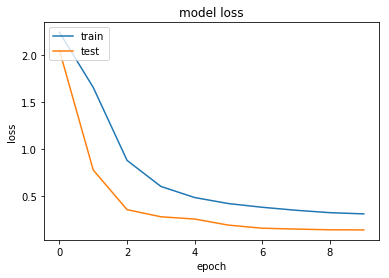

In [30]:
score = normal_data_model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

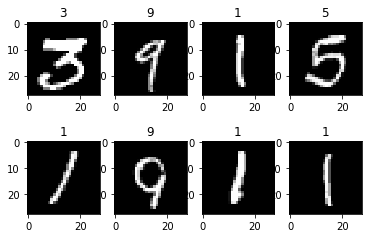

In [31]:
predicted_lr = np.argmax(normal_data_model.predict(unlabeled_data), axis=1)
for i in range(0, 8):
  pyplot.subplot(2, 4, i + 1, title=predicted_lr[i])
  pyplot.imshow(unlabeled_data[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))

pyplot.show()